# Education and Economic Factors as a Happiness predictors

## 1. Data preparation and cleaning

### 1.1 Import Utilities Library

##### Click "Run long executions" for dataset file prepararion and model training
##### Click "Don't show plots" for disabling graphics
##### Click "Delete offline plots" for deleting all offline plots

In [1]:
%matplotlib inline
from utilities import *

### 1.2 Obtaining the Dataset file

In [2]:
if not button_exec.value:
    DataPreparation.obtainDataFromLocalDBs()

### 1.3 Loading the Dataset file

In [3]:
overall_data = pd.read_csv(DataPreparation.retriveMergedFilePath(),\
                           header=0, index_col=0, skiprows=0, encoding='iso-8859-1')
overall_data.head(5)

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)",Happy Planet Index
0,Afghanistan,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.8
1,Afghanistan,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2
2,Albania,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.1
3,Albania,2009.0,NaN,NaN,NaN,NaN,89.393333,88.698219,0.98508,90.041763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.9
4,Albania,2012.0,NaN,NaN,NaN,NaN,96.137093,95.353287,0.98445,96.859650,...,NaN,58.875946,4302.0,2533.0,1769.0,99.2314,99.020187,0.99642,99.375977,54.1


### 1.4 Drop columns and rows with %(nulls)>80%

In [4]:
THRESH = 0.2
overall_data = overall_data.dropna(1, thresh=(overall_data.shape[0] * (1 - THRESH)))
overall_data = overall_data.dropna(0, thresh=(overall_data.shape[1] * (1 - THRESH)))
overall_data.head(5)

,country,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,"Population, male (% of total)","Population, total","School life expectancy, primary, both sexes (years)","School life expectancy, primary, female (years)","School life expectancy, primary, gender parity index (GPI)","School life expectancy, primary, male (years)",Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Happy Planet Index
0,Afghanistan,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,...,51.435962,29726803.0,6.53571,5.47000,0.72495,7.54532,4.0,6.0,6.0,36.8
2,Albania,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,...,50.260019,2992547.0,3.98375,3.97433,0.99544,3.99253,3.0,4.0,8.0,42.1
3,Albania,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,...,50.432577,2927519.0,4.80613,4.74382,0.97524,4.86425,3.0,5.0,7.0,47.9
4,Albania,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,...,50.128703,2900247.0,5.16259,5.09023,0.97326,5.23009,3.0,5.0,7.0,54.1
6,Algeria,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,...,50.489699,33749328.0,6.40438,6.17532,0.93223,6.62422,1.0,6.0,6.0,45.9


## 2. Data Visualization & Analysis

### 2.1 Most frequent countries appearing in the Dataset

#### 2.1.1 Show counts on globbus map

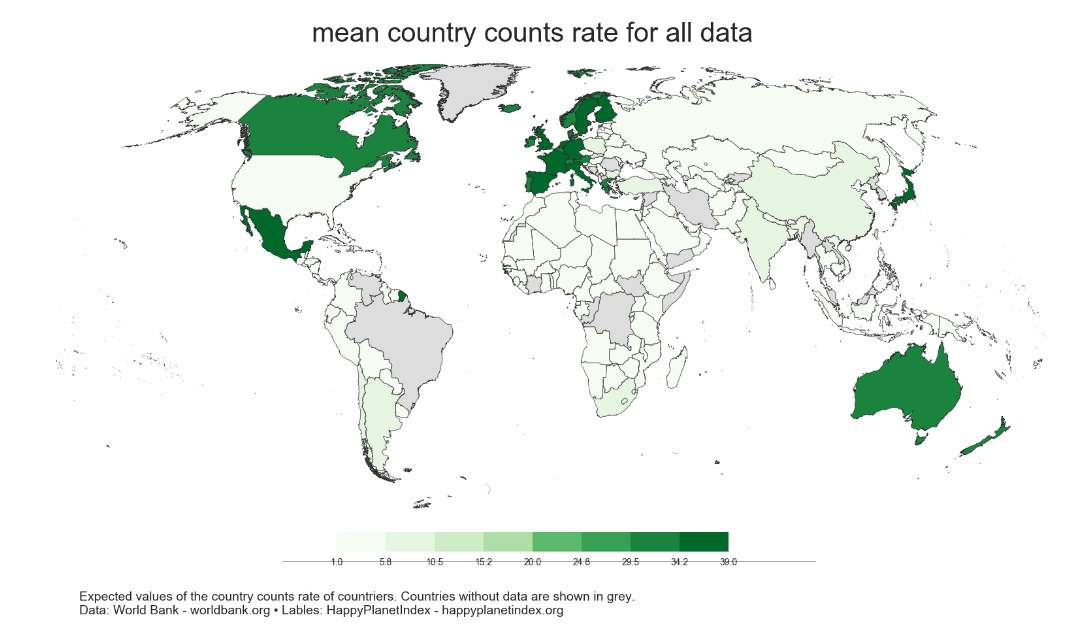

In [5]:
overall_data_country_counts = overall_data.copy()
overall_data_country_counts['country counts'] = \
    overall_data_country_counts.groupby('country')['country'].transform('count')
MapVisualizations.plotDataOnMap(overall_data_country_counts, \
                                feature='country counts', year='mean', show_plot=button_plots.value)

#### 2.1.2 Show counts in table

In [6]:
overall_data_country_counts = overall_data_country_counts\
    .groupby(['country'])[['country','country counts']].mean()
overall_data_country_counts = overall_data_country_counts.sort('country counts', ascending=False)
overall_data_country_counts.reset_index(inplace=True)
overall_data_country_counts[['country','country counts']].head(10)

,country,country counts
0,Spain,39
1,United Kingdom,39
2,Finland,39
3,Germany,39
4,Mexico,39
5,Netherlands,39
6,Sweden,39
7,Italy,39
8,Japan,39
9,France,39


### 2.2 Data distribution over the years

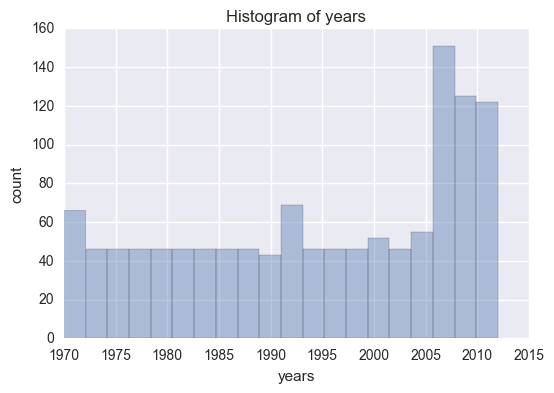

In [7]:
%matplotlib inline
if button_plots.value:
    DataVisualizations.distPlot(overall_data['year'],\
                                'Histogram of years','years','count',20,False)

### 2.3 Checking distrubution of the label visually

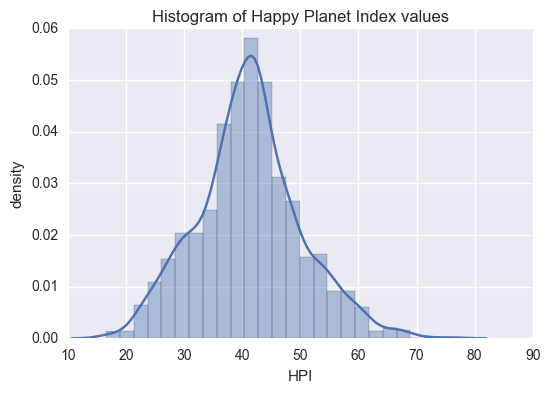

In [8]:
%matplotlib inline
if button_plots.value:
    DataVisualizations.distPlot(overall_data['Happy Planet Index'],\
                                'Histogram of Happy Planet Index values','HPI','density',25,True)

### 2.4 Most feature-target Correlated features in the data

In [9]:
HPI_correlation = overall_data[overall_data.columns[1:-1]].apply\
    (lambda x: x.corr(overall_data['Happy Planet Index'], method='spearman'))
HPI_correlation = HPI_correlation.abs().sort_values(ascending=False)
HPI_correlation = pd.DataFrame({'Feature':HPI_correlation.index,\
                                'Correlation to Happy Planet Index':HPI_correlation.values})
HPI_correlation.head(5)

,Correlation to Happy Planet Index,Feature
0,0.244313,"Population, ages 15-64, female"
1,0.242787,Population of the official age for pre-primary...
2,0.242299,Population of the official age for pre-primary...
3,0.241668,Population of the official age for pre-primary...
4,0.241227,"Population, ages 15-64, total"


### 2.5 Plot Correlation matrix, taken 2 positive and 2 negative most correlated features

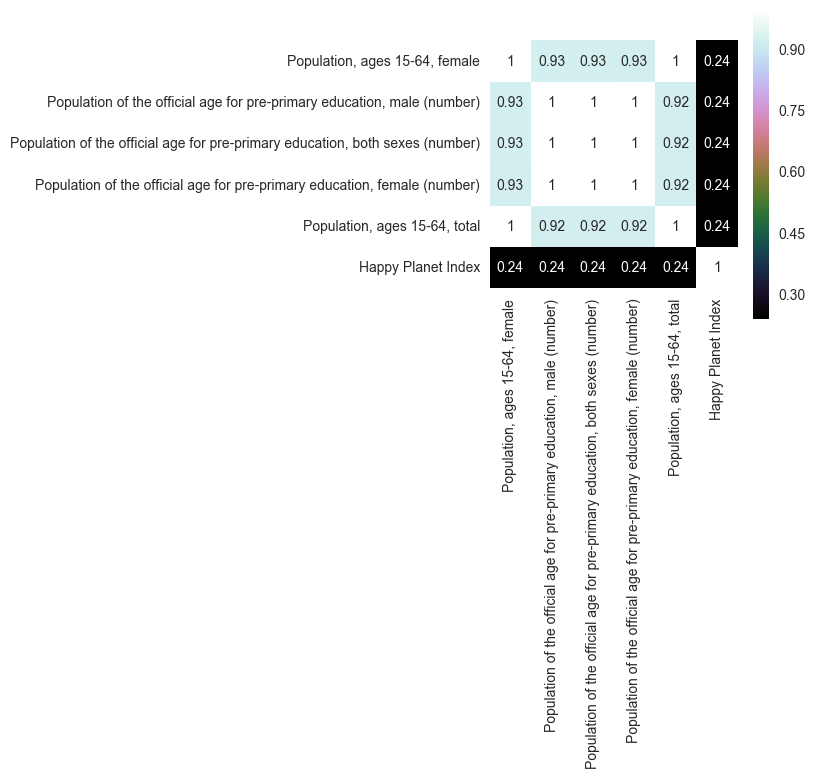

In [10]:
%matplotlib inline
corr_features = HPI_correlation['Feature'].head(5).tolist() + ['Happy Planet Index']
corr_features = [x for x in corr_features if x != 'year']
overall_data_to_plot = overall_data[corr_features]
data_corr_mat= overall_data_to_plot.corr(method='spearman')
if button_plots.value:
    plt.figure(figsize=(4,4))
    sns.heatmap(data_corr_mat, vmax=1, square=True, annot=True, cmap='cubehelix')

### 2.6 Plotting Data on world map
#### Choose between Happy Planet Index and most correlated features 
#### Unfortunatly, there is no imagination between the plots

In [11]:
if button_plots.value:
    MapVisualizations.interactMaps(overall_data,corr_features)

Please choose an option


### 2.7 Plotting boxplot of most correlated feature

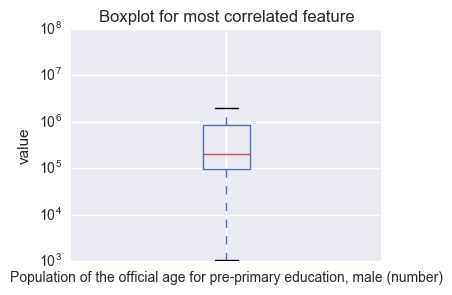

In [12]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
overall_data[corr_features[1]].to_frame().boxplot()
ax.set_yscale('log')
plt.ylabel('value')
plt.title('Boxplot for most correlated feature')

## 3. Preprocessing

### 3.1 Impute nulls with medians

In [13]:
overall_data = overall_data.fillna(overall_data.median())
overall_data.head(5)

,country,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,"Population, male (% of total)","Population, total","School life expectancy, primary, both sexes (years)","School life expectancy, primary, female (years)","School life expectancy, primary, gender parity index (GPI)","School life expectancy, primary, male (years)",Theoretical duration of pre-primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Happy Planet Index
0,Afghanistan,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,...,51.435962,29726803.0,6.53571,5.47000,0.72495,7.54532,4.0,6.0,6.0,36.8
2,Albania,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,...,50.260019,2992547.0,3.98375,3.97433,0.99544,3.99253,3.0,4.0,8.0,42.1
3,Albania,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,...,50.432577,2927519.0,4.80613,4.74382,0.97524,4.86425,3.0,5.0,7.0,47.9
4,Albania,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,...,50.128703,2900247.0,5.16259,5.09023,0.97326,5.23009,3.0,5.0,7.0,54.1
6,Algeria,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,...,50.489699,33749328.0,6.40438,6.17532,0.93223,6.62422,1.0,6.0,6.0,45.9


### 3.2 One Hot Encoding Foreach Country

In [14]:
overall_data_countries = overall_data['country']
oh_overall_data = overall_data.drop('country', axis=1)
onehot_overall_col = pd.get_dummies(overall_data['country'], prefix='country')

#check for missing cols in onehot_overall_col
for col in onehot_overall_col.columns:
    if col not in onehot_overall_col.columns:
        onehot_overall_col[col] = 0
        
oh_overall_data = pd.concat([oh_overall_data, onehot_overall_col], axis=1)
overall_data = oh_overall_data
overall_data['country'] = overall_data_countries
overall_data.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe,country
0,2012.0,5767543.0,2348306.0,1.935220e+10,2.053654e+10,651.001852,690.842629,2.157185e+10,720.0,108.928520,...,0,0,0,0,0,0,0,0,0,Afghanistan
2,2006.0,222402.0,107004.0,9.771760e+09,8.992642e+09,3265.365622,3005.012903,9.254605e+09,3090.0,99.593842,...,0,0,0,0,0,0,0,0,0,Albania
3,2009.0,236102.0,112399.0,1.150029e+10,1.204421e+10,3928.340828,4114.136545,1.185274e+10,4280.0,97.525330,...,0,0,0,0,0,0,0,0,0,Albania
4,2012.0,206617.0,97583.0,1.240477e+10,1.231978e+10,4277.143310,4247.839852,1.222802e+10,4360.0,104.784393,...,0,0,0,0,0,0,0,0,0,Albania
6,2006.0,4196580.0,1973901.0,1.446470e+11,1.170270e+11,4285.934521,3467.544740,1.126050e+11,3100.0,108.287209,...,0,0,0,0,0,0,0,0,0,Algeria


### 3.3 Split Data randomly into training set and test set

In [15]:
train_data, test_data = train_test_split\
(overall_data, test_size = 0.2, random_state=0)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe,country
0,2009.0,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0,0,0,0,0,0,0,0,0,Namibia
1,1985.0,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0,0,0,0,0,0,0,0,0,Ireland
2,1984.0,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0,0,0,0,0,0,0,0,0,Greece
3,1991.0,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0,0,0,0,0,0,0,0,0,Spain
4,2006.0,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0,0,0,0,0,0,0,0,0,Eritrea


### 3.4 Partition factors, class and countries

In [16]:
train_countries = train_data['country']
train_class = train_data['Happy Planet Index']
train_factors = (train_data.drop(['Happy Planet Index', 'country'], axis=1))

test_countries = test_data['country']
test_class = test_data['Happy Planet Index']
test_factors =(test_data.drop(['Happy Planet Index', 'country'], axis=1))

train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,2009.0,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0,0,0,0,0,0,0,0,0,0
2,1984.0,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0,0,0,0,0,0,0,0,0,0
3,1991.0,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0,0,0,0,0,0,0,0,0,0


### 3.5 Binning The Years by Decades

In [17]:
min_year = min(min(train_factors['year']), min(test_factors['year']))
train_factors['year'] = train_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))
test_factors['year'] = test_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))
train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,3,406920.0,200909.0,1.063964e+10,8.876191e+09,4943.249801,4123.939997,8.708821e+09,4120.0,108.228012,...,0,0,0,0,0,0,0,0,0,0
1,1,420665.0,205210.0,6.420870e+10,2.129391e+10,18147.884040,6018.489552,1.983712e+10,5630.0,95.102722,...,0,0,0,0,0,0,0,0,0,0
2,1,888440.0,430238.0,1.813080e+11,4.802002e+10,18321.674990,4852.565728,4.851687e+10,5130.0,105.983048,...,0,0,0,0,0,0,0,0,0,0
3,2,2820497.0,1366826.0,8.954290e+11,5.755990e+11,22995.652240,14782.038900,5.713820e+11,13720.0,105.279709,...,0,0,0,0,0,0,0,0,0,0
4,3,364263.0,161875.0,2.179437e+09,1.211162e+09,506.323083,281.375017,1.202459e+09,280.0,68.011917,...,0,0,0,0,0,0,0,0,0,0


### 3.6 Change all numeric values' datatypes to float

In [18]:
train_factors = train_factors.astype(np.float)
test_factors = test_factors.astype(np.float)
train_factors.dtypes[:5]

year                                                   float64
Enrolment in primary education, both sexes (number)    float64
Enrolment in primary education, female (number)        float64
GDP at market prices (constant 2005 US$)               float64
GDP at market prices (current US$)                     float64
dtype: object

### 3.7 Creating a yearless and countryless copies of the data
#### Henceforth, we duplicate our actions handling the data for each copy 

In [19]:
alternative_models = AlternativeModel.createAlternativeModels\
    (train_data, train_factors, train_class, train_countries, test_data, test_factors,\
                                       test_class, test_countries)

### 3.8 Data linearity proving

In [20]:
interact(OutliersDetection.allDataLinearityProving,\
             request=RadioButtons(options=  types_for_interact,\
                                  description='Select data type:', disabled=False))

Please choose an option


<function classes.OutliersDetection.allDataLinearityProving>

### 3.9 Scaling nomeric features

In [21]:
for data in data_types:
    alternative_models[data].train_factors = \
            pd.DataFrame(sp.StandardScaler().fit_transform(alternative_models[data].train_factors),columns =\
                                          alternative_models[data].train_factors.columns)
    alternative_models[data].test_factors = \
            pd.DataFrame(sp.StandardScaler().fit_transform(alternative_models[data].test_factors),columns =\
                                          alternative_models[data].test_factors.columns)
AlternativeModel.updateAlternativeModels(alternative_models)
alternative_models['main data'].train_factors.head(5)

,year,"Enrolment in primary education, both sexes (number)","Enrolment in primary education, female (number)",GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Gross enrolment ratio, primary, both sexes (%)",...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Vietnam,country_Zambia,country_Zimbabwe
0,0.780879,-0.287638,-0.296172,-0.514255,-0.378689,-1.064374,-0.728401,-0.374095,-0.745905,0.612859,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
1,-0.782461,-0.286277,-0.295247,-0.471274,-0.367663,-0.355682,-0.598975,-0.364349,-0.637493,-0.809469,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
2,-0.782461,-0.239970,-0.246859,-0.377320,-0.343932,-0.346354,-0.678625,-0.339231,-0.673391,0.369583,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
3,-0.000791,-0.048709,-0.045464,0.195653,0.124527,-0.095502,-0.000298,0.118704,-0.056662,0.293365,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188
4,0.780879,-0.291860,-0.304565,-0.521043,-0.385495,-1.302503,-0.990904,-0.380670,-1.021603,-3.745178,...,-0.063758,-0.045038,-0.176961,-0.055188,-0.055188,-0.045038,-0.03183,-0.063758,-0.03183,-0.055188


## 4. Outliers Detection

### 4.1 Robust Regression Method

In [22]:
f = FloatProgress(min=0, max=100)
display(f)
for data in data_types:
    alternative_models[data].train_factors, alternative_models[data].\
        train_class, alternative_models[data].train_data =\
                                OutliersDetection.removeOutliersRlm(alternative_models[data].train_factors, \
                                                                    alternative_models[data].train_class, \
                                                                alternative_models[data].train_data, 1,data)
    f.value += 33
    
AlternativeModel.updateAlternativeModels(alternative_models)
f.value += 1

interact(OutliersDetection.showResidualsRemoval,\
             request=RadioButtons(options=  types_for_interact,\
                                  description='Select data type:', disabled=False))

Please choose an option


<function classes.OutliersDetection.showResidualsRemoval>

### 4.2 PCA Visual Method

#### 4.2.1 Apply 2D-PCA dimension reduction for visual outliers detection 

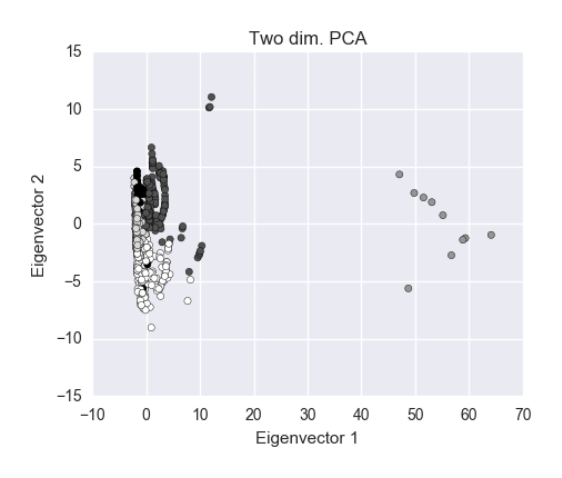

In [23]:
PCAAltModels = dict([(data,(OutliersDetection.\
                            twoDimPCAandClustering(alternative_models[data].train_factors,data))) \
                                 for data in data_types])
AlternativeModel.updateAlternativeModels(alternative_models)

interact(OutliersDetection.allDataTwoDimPCAandClustering,\
             request=RadioButtons(options=  types_for_interact,\
                                  description='Select data type:', disabled=False))

#### 4.2.2 Print outliers' countries

In [ ]:
outliers_indecies_alternative_model = dict([(data,np.where(PCAAltModels[data][0][:,0] > 20)[0].tolist()) \
                                            for data in data_types])
outliers_df_alternative_model = dict([(data,alternative_models[data].train_data.loc\
                                       [outliers_indecies_alternative_model[data], :]) for data \
                                             in data_types])
OutliersDetection.printOutlierCountries(outliers_df_alternative_model,outliers_indecies_alternative_model)

#### 4.2.3 Remove visible outliers if reducing aquracy

In [ ]:
f = FloatProgress(min=0, max=100)
display(f)
f.value += 1
for data in data_types:
    print("• ",data,"run:")
    alternative_models[data].train_factors, alternative_models[data].\
            train_class, alternative_models[data].train_data =\
                                OutliersDetection.removeOutliersPCA(alternative_models[data].train_factors,\
                                                                    alternative_models[data].train_class,\
                                                                    alternative_models[data].train_data,\
                                                                    outliers_indecies_alternative_model[data])
    f.value += 33
AlternativeModel.updateAlternativeModels(alternative_models)

## 5. Feature selection with E.Net model

### 5.1 Feature selection

In [ ]:
chosen_features_and_coefs_alternative_models = dict([(data,"") for data in data_types])
table_alternative_models = dict([(data,"") for data in data_types])

f = FloatProgress(min=0, max=100)
display(f)
f.value += 1
for data in data_types:
    chosen_features_and_coefs_alternative_models[data], table_alternative_models[data] =\
                                FeatureSelection.featureSelectionWithENET(alternative_models[data].train_factors,\
                                                                    alternative_models[data].train_class)
    f.value += 33
AlternativeModel.updateAlternativeModels(alternative_models)

FeatureSelection.printStrongCoeffs(table_alternative_models)

### 5.2 Countries correlated to target plot

In [ ]:
FeatureSelection.countriesCorrMap(chosen_features_and_coefs_alternative_models)

### 5.3 Take remaining features

In [ ]:
for data in data_types:
    chosen_features = [x[0] for x in chosen_features_and_coefs_alternative_models[data]]
    alternative_models[data].train_factors = alternative_models[data].train_factors[chosen_features]
    alternative_models[data].test_factors = alternative_models[data].test_factors[chosen_features]

## 6. Features extraction
#### Checking feature interactions' correlations to label - done only for main data type

### 6.1 Synthesizing features' interactions

In [ ]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
transf_test = poly.fit_transform(test_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) \
                                  for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) \
                                                                                  for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))
test_factors_after_extracion = (pd.DataFrame(transf_test, columns = target_feature_names))
train_factors_after_extracion.head(5)

### 6.2 Checking correlations between target and synthesized features

In [ ]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0])\
                        for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))

max_corr_before = HPI_correlation['Correlation to Happy Planet Index'].iloc[0]
HPI_correlation_feature_extraction = train_factors_after_extracion[train_factors_after_extracion.columns[:]].apply\
(lambda x: x.corr(train_data['Happy Planet Index'], method='spearman'))
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.abs().sort_values(ascending=False)
HPI_correlation_feature_extraction = pd.DataFrame({'Feature':HPI_correlation_feature_extraction.index,\
                                'Correlation to Happy Planet Index':HPI_correlation_feature_extraction.values})
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.loc\
[(HPI_correlation_feature_extraction["Correlation to Happy Planet Index"] > max_corr_before) \
 & ((HPI_correlation_feature_extraction["Feature"].\
     str.count("\^") == 2) | ((HPI_correlation_feature_extraction["Feature"].str.count("\^2") == 1)))]
print('There are', HPI_correlation_feature_extraction.shape[0],\
      'new features that are more correlative to target then \
      old features and many other new very correlative features')
HPI_correlation_feature_extraction.head(5)

## 7. Model - Kernel ridge regression

#### We use this model with the kernel trick due to the positive results of section 6.2

In [ ]:
param_grid_for_kridge = {'alpha': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
              'gamma': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]}
model = GridSearchCV(KernelRidge(kernel='polynomial', degree=2),\
                     cv=5, param_grid=param_grid_for_kridge, n_jobs=-1, verbose=1)

kernel_ridge_results = dict([(data,ResultsMeasurements(button_exec.value, alternative_models[data].train_data,\
                            alternative_models[data].test_data,alternative_models[data].train_factors,\
                                alternative_models[data].test_factors,alternative_models[data].train_class,\
                                    alternative_models[data].test_class,model,'kernel ridge resgression '+data))\
                                       for data in data_types])
tab = ResultsMeasurements.tabDisplay(kernel_ridge_results)
tab

## 8. Model Evaluation

### 8.1 Linear Regression

In [ ]:
lr = LinearRegression()
linear_regression_results = dict([(data,ResultsMeasurements(button_exec.value, alternative_models[data].train_data,\
                            alternative_models[data].test_data,alternative_models[data].train_factors,\
                                    alternative_models[data].test_factors,alternative_models[data].train_class,\
                                            alternative_models[data].test_class,lr,'linear regression '+data))\
                                               for data in data_types])
tab = ResultsMeasurements.tabDisplay(linear_regression_results)
tab

### 8.2 Ridge Regression

In [ ]:
ridge = Ridge(alpha=1.0)
ridge_regression_results = dict([(data,ResultsMeasurements(button_exec.value, alternative_models[data].train_data,\
                                alternative_models[data].test_data,alternative_models[data].train_factors,\
                                        alternative_models[data].test_factors,alternative_models[data].train_class,\
                                                alternative_models[data].test_class,ridge,'ridge resgression '+data))\
                                                   for data in data_types])
tab = ResultsMeasurements.tabDisplay(ridge_regression_results)
tab

### 8.3 Random Forest
#### The Random Forest model presents better results on the data, and therefore we will use it instead of the kernel ridge

In [ ]:
param_grid_for_random_forest = {'max_features': [None, 'sqrt', 'log2'],\
                    'n_estimators': [500, 1000, 1500], 'max_depth': [None, 1, 5, 10, 50], 'min_samples_split':\
                    [2, 3, 4, 5], 'min_samples_leaf':[1, 3, 5, 7, 9]}
clf = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_for_random_forest, cv=5,
                  n_jobs=-1, verbose=1)
random_forest_results = dict([(data,ResultsMeasurements(button_exec.value, alternative_models[data].train_data,\
                            alternative_models[data].test_data,alternative_models[data].train_factors,\
                                    alternative_models[data].test_factors,alternative_models[data].train_class,\
                                        alternative_models[data].test_class,clf,'random forest resgression '+data))\
                                           for data in data_types])
tab = ResultsMeasurements.tabDisplay(random_forest_results)
tab

### 8.4 Numeric Results Comparison for all 4 models

In [ ]:
ResultsMeasurements.compareModels(linear_regression_results, ridge_regression_results,\
                                  kernel_ridge_results,random_forest_results)

## 9. The prediction of Random Forest (elected model), on the test dataset compared to label

In [ ]:
ResultsMeasurements.compareLabelPredictionOnMap(random_forest_results)

## 10.  Types of datasets' prediction comparison (for our elected model - Random Forest)

In [ ]:
comparison_parameters = pd.DataFrame(['R^2 for Train data','R^2 for Test data','Mean HPI for Train data',\
                              'Mean pdataTypesrediction for Train data','Mean HPI for Test data',\
                                      'Mean prediction for Test data',\
                                          'Error Percentage for Train data','Error Percentage for Test data'])
for dataset in data_types:
    comparison_parameters[dataset] = random_forest_results[dataset].comparison_parameters_df
comparison_parameters.columns = ['parameter'] + data_types
display(comparison_parameters.head(10))